In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True,vertical_flip = True, zoom_range=0.2)

In [12]:
x_train = train_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\flowers",target_size = (64,64), class_mode= "categorical", batch_size = 24 )

Found 4317 images belonging to 5 classes.


In [13]:
x_test = train_datagen.flow_from_directory(r"C:\Users\DELL\Downloads\flowers",target_size = (64,64), class_mode= "categorical", batch_size = 24 )

Found 4317 images belonging to 5 classes.


In [14]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

In [16]:
model = Sequential()

In [17]:
model.add(Convolution2D(32,(3,3),input_shape= (64,64,3),activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [19]:
model.add(Dense(5,activation='Softmax'))

In [20]:
len(x_train)

180

In [22]:
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data= x_test, validation_steps=len(x_test),epochs=10)

Epoch 1/10
180/180 [==============================] - 97s 534ms/step - loss: 1.2492 - accuracy: 0.4839 - val_loss: 1.0072 - val_accuracy: 0.6055
Epoch 2/10
180/180 [==============================] - 45s 249ms/step - loss: 1.0312 - accuracy: 0.5856 - val_loss: 0.9646 - val_accuracy: 0.6356
Epoch 3/10
180/180 [==============================] - 46s 255ms/step - loss: 0.9689 - accuracy: 0.6229 - val_loss: 0.9206 - val_accuracy: 0.6407
Epoch 4/10
180/180 [==============================] - 45s 251ms/step - loss: 0.9105 - accuracy: 0.6433 - val_loss: 0.8301 - val_accuracy: 0.6722
Epoch 5/10
180/180 [==============================] - 48s 268ms/step - loss: 0.8730 - accuracy: 0.6685 - val_loss: 0.8112 - val_accuracy: 0.6996
Epoch 6/10
180/180 [==============================] - 46s 254ms/step - loss: 0.8331 - accuracy: 0.6766 - val_loss: 0.7968 - val_accuracy: 0.6921
Epoch 7/10
180/180 [==============================] - 44s 246ms/step - loss: 0.8244 - accuracy: 0.6796 - val_loss: 0.7762 - val_ac

In [26]:
model.save('IBM_flowers.h5')

In [28]:
pwd 

'C:\\Users\\Praveen'

In [29]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
model = load_model('IBM_flowers.h5')

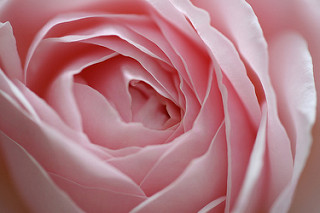

In [52]:
img = image.load_img(r'C:\Users\DELL\Downloads\flowers\rose\160954292_6c2b4fda65_n.jpg')
img

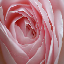

In [54]:
img = image.load_img(r'C:\Users\DELL\Downloads\flowers\rose\160954292_6c2b4fda65_n.jpg',target_size=(64,64))
img

In [55]:
x = image.img_to_array(img)

In [56]:
x

array([[[195., 182., 191.],
        [180., 156., 170.],
        [172., 125., 133.],
        ...,
        [208., 188., 200.],
        [205., 193., 203.],
        [200., 188., 198.]],

       [[190., 173., 183.],
        [174., 136., 147.],
        [168., 111., 120.],
        ...,
        [201., 177., 190.],
        [206., 190., 201.],
        [202., 189., 199.]],

       [[176., 143., 152.],
        [167., 114., 122.],
        [166.,  99., 108.],
        ...,
        [197., 169., 183.],
        [204., 186., 198.],
        [204., 190., 203.]],

       ...,

       [[102.,  64.,  53.],
        [105.,  61.,  48.],
        [103.,  60.,  44.],
        ...,
        [135., 104., 101.],
        [137., 108., 104.],
        [138., 110., 107.]],

       [[104.,  66.,  57.],
        [105.,  64.,  58.],
        [104.,  60.,  49.],
        ...,
        [134., 105., 101.],
        [132., 107., 103.],
        [137., 111., 110.]],

       [[104.,  67.,  59.],
        [105.,  65.,  57.],
        [104.,  

In [57]:
x = np.expand_dims(x,axis=0)

In [58]:
x

array([[[[195., 182., 191.],
         [180., 156., 170.],
         [172., 125., 133.],
         ...,
         [208., 188., 200.],
         [205., 193., 203.],
         [200., 188., 198.]],

        [[190., 173., 183.],
         [174., 136., 147.],
         [168., 111., 120.],
         ...,
         [201., 177., 190.],
         [206., 190., 201.],
         [202., 189., 199.]],

        [[176., 143., 152.],
         [167., 114., 122.],
         [166.,  99., 108.],
         ...,
         [197., 169., 183.],
         [204., 186., 198.],
         [204., 190., 203.]],

        ...,

        [[102.,  64.,  53.],
         [105.,  61.,  48.],
         [103.,  60.,  44.],
         ...,
         [135., 104., 101.],
         [137., 108., 104.],
         [138., 110., 107.]],

        [[104.,  66.,  57.],
         [105.,  64.,  58.],
         [104.,  60.,  49.],
         ...,
         [134., 105., 101.],
         [132., 107., 103.],
         [137., 111., 110.]],

        [[104.,  67.,  59.],
       

In [59]:
y = np.argmax(model.predict(x),axis =1)
y

1/1 [==============================] - 0s 28ms/step


array([2], dtype=int64)

In [60]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [61]:
index = ['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

'rose'